# **Examen final de Desarrollo de Aplicaciones para la Visualización de Datos**

Nombre: María Dolores

Apellidos: Roca Morlán

Tiempo: *2 horas y 30 minutos*

## **Contexto del ejercicio**

Un banco portugues desea entender en más detalle las campañas de marketing directo que ha realizado en los últimos meses a más de 40 mil clientes. Las campañas de marketing se basaron en llamadas telefónicas. Muchas veces era necesario más de un contacto con un mismo cliente, para saber si el producto (depósito bancario) sería ('sí') o no ('no') contratado.

El objetivo del análisis es buscar patrones para entender mejor que tipo de perfil tienen los clientes que han contratado el depósito para buscar en su base de datos otros clientes parecidos para aumentar la respuesta y el ROI de futuras campañas de marketing directo intentando vender el mismo depósito. Por lo tanto, se pide:

1.  Realizar un análisis descriptivo de los datos con al menos, 6 visualizaciones diferentes. (3 Puntos) (*)

2.  Montar un dashboard con al menos, 4 visualizaciones diferentes, que incluyan 2 componentes interactivas y 1 callback (5 Puntos) (*)

3. Concluir todo este análisis haciendo recomendaciones para la mejora de futuras campañas de contacto directo a partir de los resultados obtenidos de los análisis realizados con los datos. (2 Puntos)

Para realizar este análisis se provee de un juego de datos con las siguientes variables:

- age	- Edad (numérica)
- job - Ocupación (categórica)
- marital - Estado civil (categórica)
- education - Nivel educativo (categórica)
- default - ¿Tiene algún prestamo en default? (binaria)
- balance - Balance medio anual en euros (numérica)
- housing - ¿Tiene una hipoteca? (binaria)
- loan -  ¿Tiene un prestamo personal? (binaria)
- contact - Tipo de contacto (categórica)
- day_of_week - Último día de la semana que fue contactado (fecha)
- month - Último mes que fue contactado (fecha)
- duration - Duración de la última vez que fue contactado en segundos (entera)
- campaign - Número de veces que fue contactado (numérica)
- pdays - Número de días que pasaron después de que el cliente fue contactado por última vez desde una campaña anterior (numérica; -1 significa que el cliente no fue contactado previamente)
- previous - Número de contactos realizados durante esta campaña y para este cliente (numérica, incluye el último contacto)
- poutcome - Resultado de la campaña de marketing anterior (categórica; 'failure','nonexistent','success')
- y - El cliente ha contratado el depósito (binaria, yes, no)

Recuerda, si tuvieras que programar una función, comenta los argumentos de entrada y salida. **Explica el orden que estás siguiendo a la hora de elegir las visualizaciones y comenta las conclusiones que vas sacando.**


**(*) IMPORTANTE**: Puedes elegir realizar un modelo de clasificación y realizar visualizaciones en torno a ese modelo en los primeros dos apartados. Esta parte no es obligatoria. El objetivo de la clasificación sería predecir si el cliente se suscribirá a un depósito bancario (variable y).








### **Librerías necesarias**

### **Análisis descriptivos**

In [2]:
import pandas as pd

df = pd.read_csv('bank-full.csv', sep=';')
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# 1- Realizar un análisis descriptivo de los datos con al menos, 6 visualizaciones diferentes.

### 1- DISTRIBUCIÓN DE EDADES

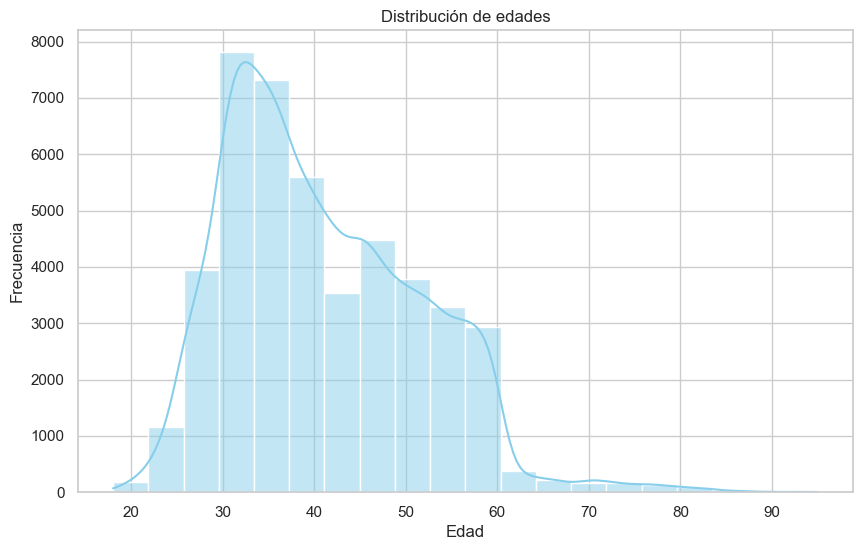

In [13]:

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')

plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de edades')

plt.show()


### 2-DISTRIBUCIÓN DE TRABAJOS

C:\Users\lolar\AppData\Local\Temp\ipykernel_12668\3950919735.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




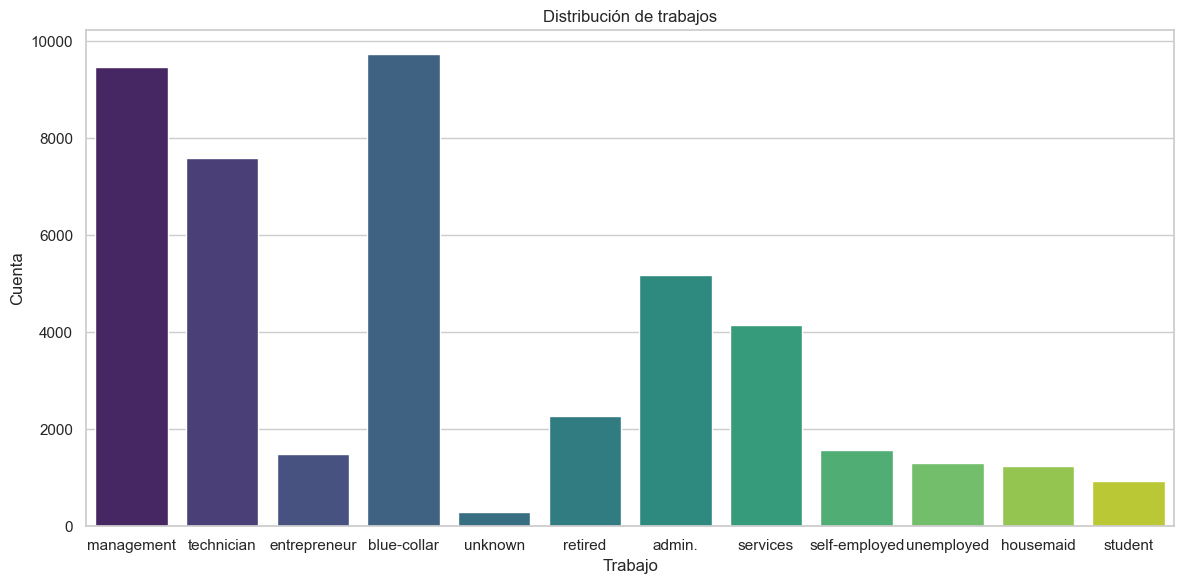

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.countplot(x=df['job'], data=df, palette='viridis')

plt.xlabel('Trabajo')
plt.ylabel('Cuenta')
plt.title('Distribución de trabajos')

plt.tight_layout()

plt.show()


### 3- ESTADO DE NUESTROS CLIENTES

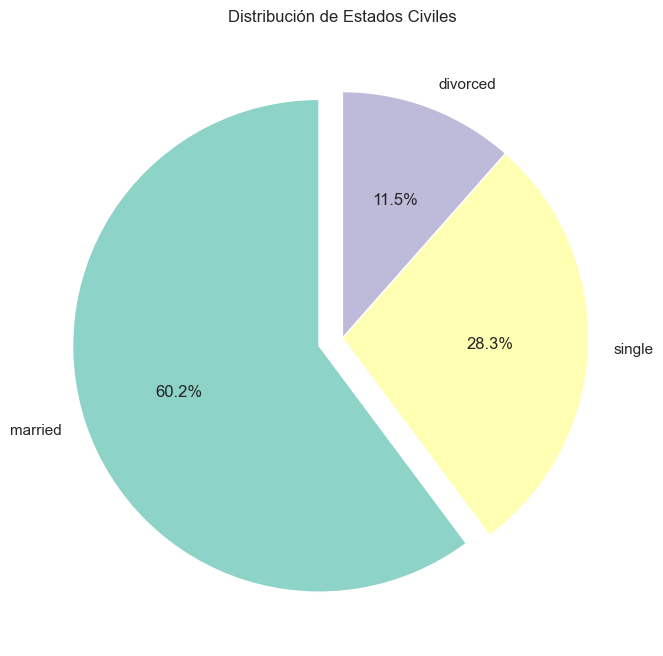

In [22]:
import matplotlib.pyplot as plt

marital_counts = df['marital'].value_counts() #cuenta de los estados que hay

colors = sns.color_palette('Set3', n_colors=len(marital_counts))

labels = marital_counts.index #etiquetas de los estados
explode = (0.1, 0, 0)  

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(marital_counts, labels=labels, autopct='%1.1f%%', colors=colors, explode=explode, startangle=90)

# Configurar título
plt.title('Distribución de Estados Civiles')

# Mostrar el gráfico de pastel
plt.show()


### 4- CLIENTES CON PRÉSTAMOS E HIPOTECAS

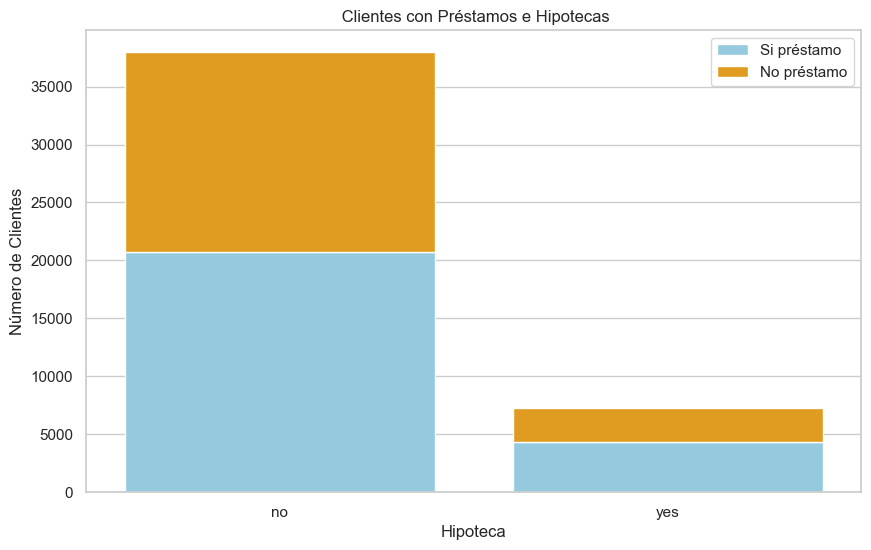

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt


loan_housing_df = df.groupby(['loan', 'housing']).size().unstack().reset_index() #agrupar por prestamos y hipotecas
#obtener el tamaño de cada grupo y la frecuencia de cada uno
#creamos un dataframe

plt.figure(figsize=(10, 6))
sns.barplot(x='loan', y='yes', data=loan_housing_df, color='skyblue', label='Si préstamo')
sns.barplot(x='loan', y='no', data=loan_housing_df, bottom=loan_housing_df['yes'], color='orange', label='No préstamo')


plt.xlabel('Hipoteca')
plt.ylabel('Número de Clientes')
plt.title(' Clientes con Préstamos e Hipotecas')


plt.legend()



plt.show()


### 5- ÚLTIMO MES CONTACTADO Y DURACIÓN DE LA LLAMADA

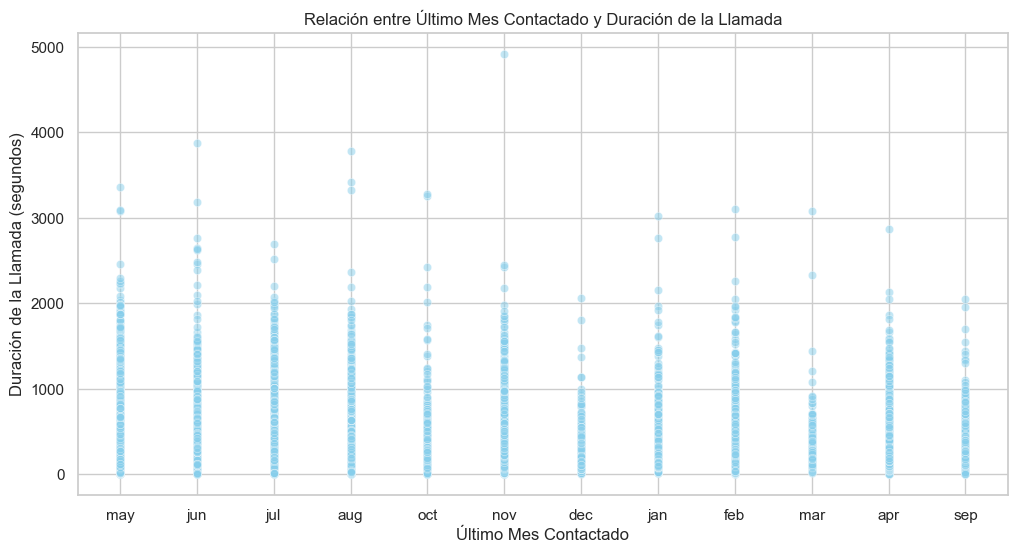

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid")

#gráfico de dispersion
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['month'], y=df['duration'], data=df, alpha=0.5, color='skyblue')


plt.xlabel('Último Mes Contactado')
plt.ylabel('Duración de la Llamada (segundos)')
plt.title(' Último Mes Contactado y Duración de la Llamada')



plt.show()


### 6-REALACIÓN TRABAJO Y BALANCE

C:\Users\lolar\AppData\Local\Temp\ipykernel_12668\2504600868.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




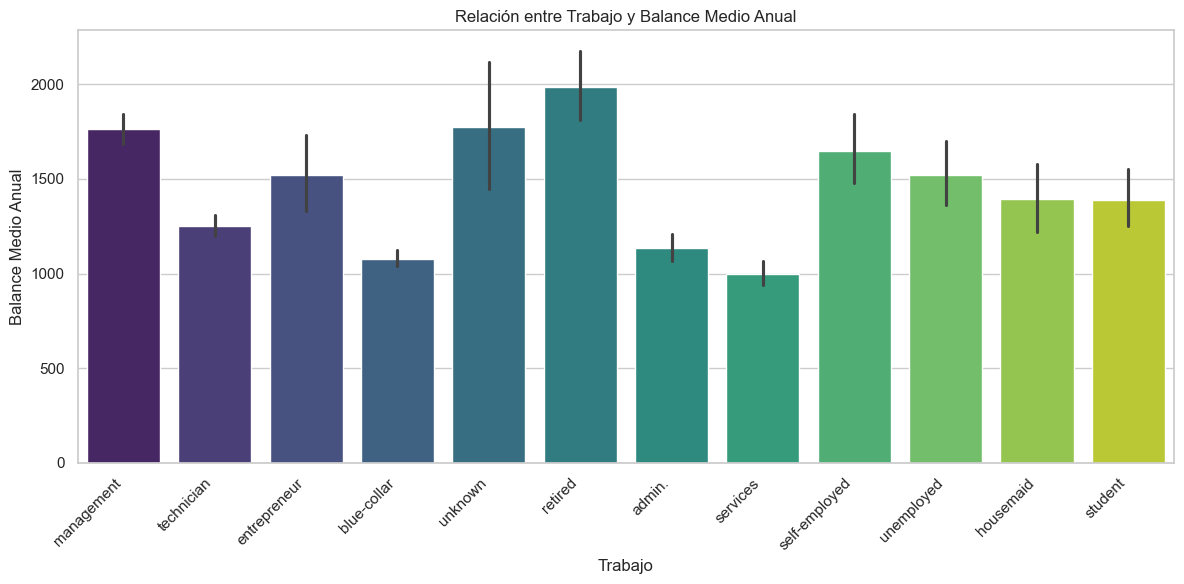

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo de Seaborn (opcional)
sns.set(style="whitegrid")

# Crear un gráfico de barras apiladas
plt.figure(figsize=(12, 6))
sns.barplot(x='job', y='balance', data=df, palette='viridis')

# Configurar etiquetas y título
plt.xlabel('Trabajo')
plt.ylabel('Balance Medio Anual')
plt.title('Relación entre Trabajo y Balance Medio Anual')

# Ajustar el diseño para evitar que las etiquetas se corten
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar el gráfico de barras apiladas
plt.show()




# 2 - Montar un dashboard con al menos, 4 visualizaciones diferentes, que incluyan 2 componentes interactivas y 1 callback (5 Puntos)

In [58]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

# Cargar el conjunto de datos
df = pd.read_csv('bank-full.csv', sep=';')

# Inicializar la aplicación Dash
app = dash.Dash(__name__)

# Definir el diseño
app.layout = html.Div([
    html.H1('Dashboard para el marketing del banco'),
    
    html.Div([
        # Lista desplegable para seleccionar la edad
        dcc.Dropdown(
            id='edad',
            options=[{'label': str(age), 'value': age} for age in df['age'].unique()],
            value=df['age'].min(),  # Valor predeterminado
            style={'width': '50%'}
        ),
        
        # Gráfico de barras para los trabajos correspondientes a la edad seleccionada
        dcc.Graph(id='trabajo', style={'height': '500px'})  # Ajusta la altura según tus necesidades
    ], style={'display': 'flex'}),
])

# Definir la función de devolución de llamada
@app.callback(
    Output('trabajo', 'figure'),
    [Input('edad', 'value')]
)
def update_job_distribution(selected_age):
    # Filtrar el DataFrame según la edad seleccionada
    filtered_df = df[df['age'] == selected_age]
    
    # Crear un gráfico de barras para los trabajos
    fig = px.bar(filtered_df['job'].value_counts(), 
                 x=filtered_df['job'].value_counts().index, 
                 y=filtered_df['job'].value_counts().values,
                 labels={'x': 'Trabajo', 'y': 'Número de Clientes'})
    
    fig.update_layout(title='Distribución de Trabajos para la Edad: {}'.format(selected_age))
    
    return fig

# Ejecutar la aplicación
if __name__ == '__main__':
    app.run_server(debug=True)
